# Exploratory Analysis on Kobe's Shots Data

In honor of a great player who just retired after a career that spanned two decades, data on all the shots he ever took in the NBA is provided on Kaggle. Predicting anything in sports is pretty difficult, so this exercise is used mostly for practing EDA with pandas

In [1]:
#### in this implementation, a random forest predictor is used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#if data file is not in the location as the notebook, the following code is necessary:

import os
filepath="E:/numerical/kobe/data.csv"  #or wherever it is stored
pwd=os.getcwd()
pwd
os.chdir(os.path.dirname(filepath))
df = pd.read_csv(os.path.basename(filepath),header=0) #read data
os.chdir(pwd) #change back to current folder
df.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
#df=pd.read_csv('train.csv')


In [4]:
df.columns


Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

Lots of interesting info here. Some of it seem a bit excessive, such as longitudes and latitudes. I will remove these columns

Drop Useless columns

In [5]:
df.drop(['lat','lon'], axis=1,inplace= True)

I'm really interested in knowing the number of shots and quality of shots in his game

In [6]:
# percentage of all basketballs broken down by period
for i in range(1,5):
    print( i, len(df[(df['shot_made_flag']== 1 ) & (df['period']== i)])/len(df[df['shot_made_flag']==1]))

1 0.2721325774095072
2 0.22058438726559093
3 0.2769297863061492
4 0.21805494984736154


In terms of absolute number of shots made, 1st and 3rd quarters are more productive. Perhaps he had more energy.

Kobe wasn both shooting more and he was more accurate too:

In [7]:
#shot accuracy per period
for i in range(1,5):
    print( i, len(df[(df['shot_made_flag']== 1 ) & (df['period']== i)])/len(df[df['period']==i]) )

1 0.38767395626242546
2 0.37645132479904736
3 0.3827145612343298
4 0.3443526170798898


In [8]:
#tendency to take shots by period
for i in range(1,5):
    print( i,len(df[df['period']== i])/len(df['period']) )

1 0.2621754568850376
2 0.21884874743460273
3 0.2702544222562465
4 0.23650519594748673


In [9]:
scored=df[df['shot_made_flag']==1]
missed=df[df['shot_made_flag']==0]

Let's see where he is shooting, and where he is scoring

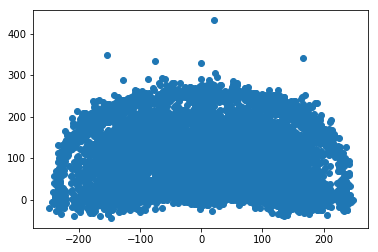

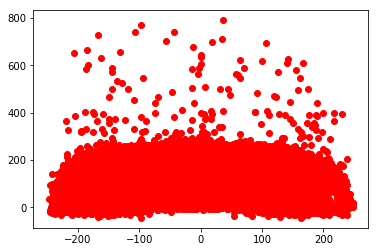

In [10]:
%matplotlib inline
plt.scatter(scored['loc_x'],scored['loc_y'])
plt.show()
plt.scatter(missed['loc_x'],missed['loc_y'],c='red')
plt.show()

Not very helpful: too many points. Let's smooth it out to see a smoother distribution of where all the shots took place

C:\Users\Steven\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


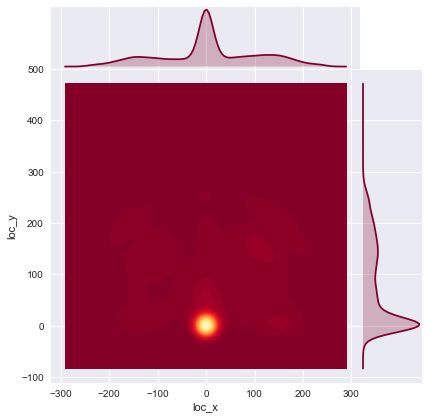

In [11]:
import seaborn as sns
cmap=plt.cm.YlOrRd_r #choose colormap
gradient_map=sns.jointplot(scored['loc_x'],scored['loc_y'],stat_func=None,
                          kind='kde',space=0,color=cmap(0,1),cmap=cmap, n_levels=50)

C:\Users\Steven\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


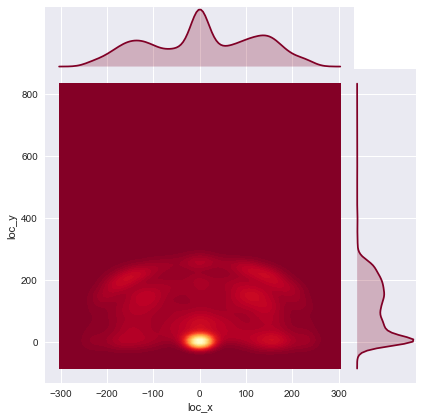

In [12]:
gradient_map=sns.jointplot(missed['loc_x'],missed['loc_y'],stat_func=None,
                          kind='kde',space=0,color=cmap(0,1),cmap=cmap, n_levels=50)

In [13]:
#breakdown by time of number of shots taken for each minute of the game
shots_taken=np.empty((4,12))
for j in range (1,5):
    for i in range (0,12):
        #print( j,i,len(df[(df['period']== j) & (df['minutes_remaining']==i)])/len(df['period']) )
        shots_taken[(j-1),i]=len(df[(df['period']== j) & (df['minutes_remaining']==i)])/len(df['period']) 

In [14]:
shots_taken=shots_taken.reshape(12*4,1)
shots_taken

array([[ 0.02984005],
       [ 0.02019741],
       [ 0.02404144],
       [ 0.0227058 ],
       [ 0.02179366],
       [ 0.02185881],
       [ 0.01951331],
       [ 0.02088152],
       [ 0.02101183],
       [ 0.02107698],
       [ 0.02133759],
       [ 0.01791706],
       [ 0.03397726],
       [ 0.02189139],
       [ 0.02296641],
       [ 0.02309672],
       [ 0.02387855],
       [ 0.02009968],
       [ 0.01609278],
       [ 0.01231391],
       [ 0.01192299],
       [ 0.011076  ],
       [ 0.01140177],
       [ 0.01013128],
       [ 0.02785288],
       [ 0.01922012],
       [ 0.02189139],
       [ 0.02189139],
       [ 0.02329218],
       [ 0.02283611],
       [ 0.02234746],
       [ 0.02273838],
       [ 0.02156563],
       [ 0.02426947],
       [ 0.02280353],
       [ 0.01954588],
       [ 0.0303287 ],
       [ 0.02560511],
       [ 0.02123986],
       [ 0.02273838],
       [ 0.022152  ],
       [ 0.02156563],
       [ 0.01967619],
       [ 0.01622308],
       [ 0.01518064],
       [ 0

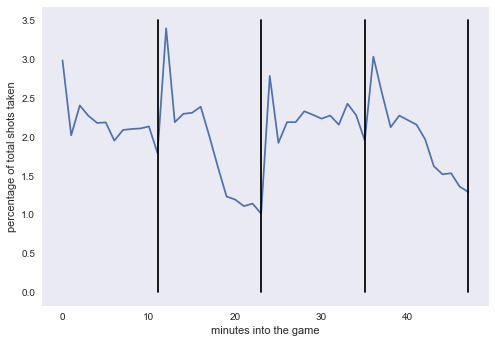

In [15]:
#np.arange(1,49)
plt.plot(np.arange(0,48),shots_taken*100)
plt.ylabel('percentage of total shots taken')
plt.xlabel('minutes into the game')
plt.plot([11, 11],[0,3.5],'black',[23, 23],[0,3.5],'black',[35, 35],[0,3.5],'black',[47, 47],[0,3.5],'black',)
# turn off that annoying grid
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator = MultipleLocator(12)
minorLocator = MultipleLocator(10) #not sure what happened
plt.grid()
plt.show()

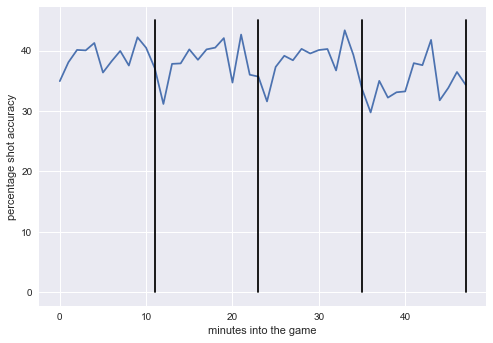

In [16]:
#accuracy of shots breakdown by minute
shots_accuracy=np.empty((4,12))
for j in range (1,5):
    for i in range (0,12):
        shots_accuracy[(j-1),i]=len(scored[(scored['period']== j) & (scored['minutes_remaining']==i)])/len(df[(df['period']== j) & (df['minutes_remaining']==i)])
        
shots_accuracy=shots_accuracy.reshape(12*4,1)
plt.plot(np.arange(0,48),shots_accuracy*100)
plt.ylabel('percentage shot accuracy')
plt.xlabel('minutes into the game')
plt.plot([11, 11],[0,45],'black',[23, 23],[0,45],'black',[35, 35],[0,45],'black',[47, 47],[0,45],'black',)
# turn off that annoying grid
#from matplotlib.ticker import MultipleLocator, FormatStrFormatter
#majorLocator = MultipleLocator(12)
#minorLocator = MultipleLocator(10) #not sure what happened
#plt.grid()
plt.show()

Kobe is shooting less as a quarter progresses. Probably has to do with fatigue, but also the defense is tightening towards the end of the quarter. While he takes a lot of shots at the beginning of each quarter, this is also when his accuracy is the worst. Maybe his hands haven't warmed up. Slowly his accuracy improves, even as the number of shots taken drops, peaking around three quarters of the way into the quarter. In the final moments of the quarter, his accuracy drops. This is understandable, as players often have to take tough shots towards the end.

I then began to start cleaning up the data for some quick predictive analysis. In retrospect, now I know to to_dummies would have been the much simpler way of doing a lot of the cleaning.

In [17]:
team_array=df['opponent'].unique()
team_array.dtype

dtype('O')

In [18]:
team_array


array(['POR', 'UTA', 'VAN', 'LAC', 'HOU', 'SAS', 'DEN', 'SAC', 'CHI',
       'GSW', 'MIN', 'IND', 'SEA', 'DAL', 'PHI', 'DET', 'MIL', 'TOR',
       'MIA', 'PHX', 'CLE', 'NJN', 'NYK', 'CHA', 'WAS', 'ORL', 'ATL',
       'MEM', 'BOS', 'NOH', 'NOP', 'OKC', 'BKN'], dtype=object)

In [19]:
df['opp_id']=df['opponent'].map( {'POR':0, 'UTA':1, 'VAN':2, 'LAC':3,
                                 'HOU':4, 'SAS':5, 'DEN':6, 'SAC':7, 'CHI':8, 'GSW': 9, 'MIN':10, 'IND':11,
                                 'SEA': 12, 'DAL': 13, 'PHI': 14, 'DET': 15, 'MIL': 16, 'TOR': 17, 
                                 'MIA':18, 'PHX':19, 'CLE':20, 'NJN': 21, 'NYK':22, 'CHA':23, 'WAS':24, 'ORL': 25,
                                 'ATL': 26, 'MEM': 27, 'BOS':28, 'NOH':29, 'NOP':30, 'OKC':31, 'BKN':32}).astype(int)
df.drop(['opponent'],axis=1, inplace=True)
#afterwards I learned that the get_dummies function is much simpler

In [20]:
df['combined_shot_type'].unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'], dtype=object)

In [21]:
df['shot_val']=df['combined_shot_type'].map({'Jump Shot': 0, 'Dunk':1, 'Layup': 2, 'Tip Shot': 3, 'Hook Shot': 4,
                                           'Bank Shot':5}).astype(int)
df.drop(['combined_shot_type'], axis=1, inplace=True)

In [22]:
df['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [23]:
df['shot_points']=df['shot_type'].map({'2PT Field Goal':2, '3PT Field Goal':3}).astype(int)
df.drop(['shot_type'], axis=1, inplace=True)

In [24]:
df['shot_zone_area'].unique()

array(['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', 'Back Court(BC)'], dtype=object)

In [25]:
df['shot_zone_region']=df['shot_zone_area'].map({'Right Side(R)':0, 'Left Side(L)':1, 'Left Side Center(LC)':2,
       'Right Side Center(RC)':3, 'Center(C)':4, 'Back Court(BC)':5})
df.drop(['shot_zone_area'],axis=1, inplace=True)

In [26]:
df.drop(['action_type','season','game_date','matchup','shot_zone_range','shot_zone_basic'],axis=1, inplace=True)
df.columns

Index(['game_event_id', 'game_id', 'loc_x', 'loc_y', 'minutes_remaining',
       'period', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'team_id', 'team_name', 'shot_id', 'opp_id',
       'shot_val', 'shot_points', 'shot_zone_region'],
      dtype='object')

In [27]:
try1=df   
try1.drop(['game_event_id','game_id','team_name','team_id'],axis=1,inplace=True)

In [28]:
shot_flag=try1['shot_made_flag']
try1.drop(labels=['shot_made_flag'],axis=1,inplace=True)
try1.insert(0,'shot_made_flag',shot_flag)
try1.head(5)

,shot_made_flag,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_id,opp_id,shot_val,shot_points,shot_zone_region
0,NaN,167,72,10,1,0,27,18,1,0,0,2,0
1,0.0,-157,0,10,1,0,22,15,2,0,0,2,1
2,1.0,-101,135,7,1,0,45,16,3,0,0,2,2
3,0.0,138,175,6,1,0,52,22,4,0,0,2,3
4,1.0,0,0,6,2,0,19,0,5,0,1,2,4


In [29]:
#NaN values dropped
train_data=try1[pd.notnull(try1['shot_made_flag'])]
train_data.head(5)

,shot_made_flag,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_id,opp_id,shot_val,shot_points,shot_zone_region
1,0.0,-157,0,10,1,0,22,15,2,0,0,2,1
2,1.0,-101,135,7,1,0,45,16,3,0,0,2,2
3,0.0,138,175,6,1,0,52,22,4,0,0,2,3
4,1.0,0,0,6,2,0,19,0,5,0,1,2,4
5,0.0,-145,-11,9,3,0,32,14,6,0,0,2,1


In [30]:
test_data=try1[pd.isnull(try1['shot_made_flag'])]
test_data.head(5)

,shot_made_flag,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_id,opp_id,shot_val,shot_points,shot_zone_region
0,NaN,167,72,10,1,0,27,18,1,0,0,2,0
7,NaN,1,28,8,3,0,5,2,8,0,0,2,4
16,NaN,0,0,0,1,0,1,0,17,1,2,2,4
19,NaN,0,0,10,3,0,46,0,20,1,2,2,4
32,NaN,163,76,11,1,0,26,17,33,2,0,2,0


In [31]:
shot_id=test_data['shot_id'].values

In [32]:
train_data.drop(labels=['shot_id'],axis=1,inplace=True)
test_data.drop(labels=['shot_made_flag','shot_id'],axis=1,inplace=True)
test_data.head(5)

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,opp_id,shot_val,shot_points,shot_zone_region
0,167,72,10,1,0,27,18,0,0,2,0
7,1,28,8,3,0,5,2,0,0,2,4
16,0,0,0,1,0,1,0,1,2,2,4
19,0,0,10,3,0,46,0,1,2,2,4
32,163,76,11,1,0,26,17,2,0,2,0


In [33]:
test_data['time remaining']=test_data.minutes_remaining*60+test_data.seconds_remaining
test_data['total_time_remaining']=(test_data.minutes_remaining+(4-test_data.period)*12)*60+test_data.seconds_remaining
test_data.head(5)

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,opp_id,shot_val,shot_points,shot_zone_region,time remaining,total_time_remaining
0,167,72,10,1,0,27,18,0,0,2,0,627,2787
7,1,28,8,3,0,5,2,0,0,2,4,485,1205
16,0,0,0,1,0,1,0,1,2,2,4,1,2161
19,0,0,10,3,0,46,0,1,2,2,4,646,1366
32,163,76,11,1,0,26,17,2,0,2,0,686,2846


In [34]:
train_data['time remaining']=train_data.minutes_remaining*60+train_data.seconds_remaining
train_data['total_time_remaining']=(train_data.minutes_remaining+(4-train_data.period)*12)*60+train_data.seconds_remaining
train_data.head(5)

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,shot_made_flag,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,opp_id,shot_val,shot_points,shot_zone_region,time remaining,total_time_remaining
1,0.0,-157,0,10,1,0,22,15,0,0,2,1,622,2782
2,1.0,-101,135,7,1,0,45,16,0,0,2,2,465,2625
3,0.0,138,175,6,1,0,52,22,0,0,2,3,412,2572
4,1.0,0,0,6,2,0,19,0,0,1,2,4,379,1819
5,0.0,-145,-11,9,3,0,32,14,0,0,2,1,572,1292


In [35]:
training=train_data.values
testing=test_data.values

In [36]:
# cross validation step 
# try the stratified k-folds method
from sklearn.cross_validation import StratifiedKFold
eval_size=0.1 #10 percent of data as validation
kf=StratifiedKFold(training[0::,0],round(1./eval_size))
train_indices, cv_indices= next(iter(kf))
x_train, y_train = training[train_indices,1::], training[train_indices, 0]
x_cv, y_cv =training[cv_indices,1::], training[cv_indices, 0]

C:\Users\Steven\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
#using built-in c.v. 
from sklearn.cross_validation import cross_val_score
#forest=RandomForestClassifier(n_estimators=1200,max_depth=5)
#scores=cross_val_score(forest,training[0::,1::],training[0::,0],cv=5)
#scores

#sweep some major r.f. parameters for the best performance
from sklearn.ensemble import RandomForestClassifier
for estimator_num in [100,300,500,800,1200]:
    for depth_num in [5,8,15,25,30]:
        forest=RandomForestClassifier(n_estimators=estimator_num, max_depth=depth_num)
        scores=np.mean(cross_val_score(forest,training[0::,1::],training[0::,0],cv=5))
        print(estimator_num, depth_num, scores)


100 5 0.612639925253
100 8 0.612990089519
100 15 0.606374523651
100 25 0.590263643474
100 30 0.587578545993
300 5 0.613651734694
300 8 0.612873373145
300 15 0.604273220047
300 25 0.591859155932
300 30 0.588628993362
500 5 0.614040945755
500 8 0.613184679906
500 15 0.606102225826
500 25 0.591703468479
500 30 0.588706927948
800 5 0.613340412789
800 8 0.61334032193
800 15 0.606063065457
800 25 0.590847255632
800 30 0.588239782301
1200 5 0.613535003176
1200 8 0.613340344645
1200 15 0.606802614931
1200 25 0.592948642524
1200 30 0.590536085159


In [38]:

forest=RandomForestClassifier(n_estimators=300,max_depth=5)

forest=forest.fit(x_train,y_train)
    

In [39]:
#final results
output=forest.predict(testing)

I would expect shot percentage between 35% to 40%, so this is a sanity check:

In [40]:
len(output[output==1])/len(output)

0.2442

Ok so this is not great. In the future, I'll have to spend more time building a realistic model

In [105]:
submission1=pd.DataFrame({"shot_id": shot_id, "shot_made_flag": output})
submission1["shot_made_flag"]=submission1.shot_made_flag.astype(np.int64)
submission1.to_csv("kobe_rf.csv",index=False)

0.17942583732057416